# Multiplicacion de matrices

Sean $A$ y $B$ dos matrices de tamaño $n\times n$. Ahora dividimos las matrices en submatrices $A_{i,j}$ y $B_{i,j}$ de tamaño $n/2 \times n/2$ 
$$	
A = \begin{pmatrix}
    A_{1,1} & A_{1,2} \\
    A_{2,1} & A_{2,2} \\
    \end{pmatrix}
$$

$$
B = \begin{pmatrix}
	B_{1,1} & B_{1,2} \\
	B_{2,1} & B_{2,2} \\
	\end{pmatrix}
$$
    
La multiplicaci\'on de las dos matrices puede ser resuelto como:

$$
A  \times B = \begin{pmatrix}
	C_{1,1} & C_{1,2} \\
	C_{2,1} & C_{2,2} \\
	\end{pmatrix}
$$

$$
A =\begin{pmatrix}
	A_{1,1} & A_{1,2} \\
	A_{2,1} & A_{2,2} \\
	\end{pmatrix} \times \begin{pmatrix}
	B_{1,1} & B_{1,2} \\
	B_{2,1} & B_{2,2} \\
\end{pmatrix}
$$

$$
C_{i,j}= \sum_{k=1}^n A_{i,k} \times B_{k,j}
$$


In [1]:
import numpy as np 


def default_matrix_multiplication(A, B):
    if get_matrix_dimensions(A) != get_matrix_dimensions(B):
        raise Exception(f'Both matrices are not the same dimension!')
    n = A.shape[0]
    C = [[0 for i in np.arange(n)] for j in np.arange(n)]
    for i in np.arange(n):
        for j in np.arange(n):
            for k in np.arange(n):
                C[i][j] += A[i,k] * B[k,j]
    return np.matrix(C)

# Algoritmo Strassen

El algoritmo Strassen es un metodo del tipo Divide y Vencer\'as para resolver el problema de la multiplicacion de matrices cuadradas. El algoritmo Strassen calcula las siguientes operaciones:

$$
p_1 = (a_{11}) \times (b_{12} - b_{22})\\
p_2 = (a_{11} + a_{12}) \times (b_{22})\\
p_3 = (a_{21} + a_{22}) \times (b_{11})\\         
p_4 = (a_{22}) \times (b_{21} - b_{11})\\         
p_5 = (a{11} + a_{22}) \times (b_{11} + b_{22})\\         
p_6 = (a_{12} - a_{22}) \times  (b_{21} + b_{22})\\   
p_7 = (a{11} - a_{21}) \times (b_{11} + b_{12})
$$

$$
C_{1,1}=p_5+p_4 - p_2 +p_6\\
C_{1,2}=p_1 + p_2\\
C_{2,1}=p_3 + p_4\\
C_{2,2}=p_1 + p_5 - p_3 +p_7
$$

El siguiente codigo implementa una version recursiva del algoritmo Strassen:

In [3]:
def split_matrix(A):
    if A.shape[0] % 2 != 0 or A.shape[1] % 2 != 0:
        raise Exception('Odd matrices are not supported!')
    matrix_length = A.shape[0]
    mid = matrix_length // 2
    a11 = A[:mid,:mid]
    a21 = A[mid:,:mid]
    a22 = A[mid:,mid:]
    a12 = A[:mid,mid:]
    
    return a11, a12, a21, a22

def get_matrix_dimensions(matrix):
    return matrix.shape

def strassen(A,B,base_case=2): 
    # Base case when size of matrices is 1x1 
    if get_matrix_dimensions(A) != get_matrix_dimensions(B):
        raise Exception(f'Both matrices are not the same dimension!')
    if get_matrix_dimensions(A) == (base_case, base_case):
        return default_matrix_multiplication(A, B)

    a11, a12, a21, a22 = split_matrix(A) 
    b11, b12, b21, b22 = split_matrix(B) 
  
    p1 = strassen(a11, b12 - b22)   
    p2 = strassen(a11 + a12, b22)         
    p3 = strassen(a21 + a22, b11)         
    p4 = strassen(a22, b21 - b11)         
    p5 = strassen(a11 + a22, b11 + b22)         
    p6 = strassen(a12 - a22, b21 + b22)   
    p7 = strassen(a11 - a21, b11 + b12)   
  
    c11 = p5 + p4 - p2 + p6   
    c12 = p1 + p2            
    c21 = p3 + p4             
    c22 = p1 + p5 - p3 - p7   
  
    C = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))  
    return C 

Los resultados de la implementacion iterativa y la version recursiva de los algoritmos de multiplicacion de matrices pueden ser comparados con los resutados de Numpy.

In [8]:
def compare_results(C,A,B,decimals=2):
    return np.array_equal(np.around(np.matmul(A,B), decimals=decimals),
                          np.around(C,decimals=decimals))

In [58]:
def recursive_matrix_multiplication(A,B,base_case=2): 
    # Base case when size of matrices is 1x1 
    if get_matrix_dimensions(A) != get_matrix_dimensions(B):
        raise Exception(f'Both matrices are not the same dimension!')
    if get_matrix_dimensions(A) == (base_case, base_case):
        return default_matrix_multiplication(A, B)

    a11, a12, a21, a22 = split_matrix(A) 
    b11, b12, b21, b22 = split_matrix(B)   
  
    c11 = recursive_matrix_multiplication(a11,b11)+recursive_matrix_multiplication(a12,b21)  
    c12 = recursive_matrix_multiplication(a11,b12)+recursive_matrix_multiplication(a12,b22)            
    c21 = recursive_matrix_multiplication(a21,b11)+recursive_matrix_multiplication(a22,b21)            
    c22 = recursive_matrix_multiplication(a21,b12)+recursive_matrix_multiplication(a22,b22)  
  
    C = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))  
    return C 

In [81]:
import multiprocessing

def parallel_strassen(A,B,base_case=2): 
    # Base case when size of matrices is 1x1 
    if get_matrix_dimensions(A) != get_matrix_dimensions(B):
        raise Exception(f'Both matrices are not the same dimension!')
    if get_matrix_dimensions(A) == (base_case, base_case):
        return default_matrix_multiplication(A, B)

    a11, a12, a21, a22 = split_matrix(A) 
    b11, b12, b21, b22 = split_matrix(B) 
  
    b1 =(a11, b12 - b22)   
    b2 =(a11 + a12, b22)         
    b3 = (a21 + a22, b11)         
    b4 = (a22, b21 - b11)         
    b5 = (a11 + a22, b11 + b22)         
    b6 = (a12 - a22, b21 + b22)  
    b7 = (a11 - a21, b11 + b12)
    blocks=[b1,b2,b3,b4,b5,b6,b7] 
    pool = multiprocessing.Pool(processes=7)
    pool_outputs = pool.starmap(strassen, blocks)
    pool.close()
    pool.join()  
    c11 = pool_outputs[4] + pool_outputs[3] - pool_outputs[1] + pool_outputs[5]   
    c12 = pool_outputs[0] + pool_outputs[1]            
    c21 = pool_outputs[2] + pool_outputs[3]             
    c22 = pool_outputs[0] + pool_outputs[4] - pool_outputs[2] - pool_outputs[6]   
    C = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))  
    return C 

In [83]:
n = 128
A = np.matrix(np.random.uniform(0.0, 1.0, n*n).reshape(n,n))
B = np.matrix(np.random.uniform(0.0, 1.0, n*n).reshape(n,n))

t1=time.time()
C=default_matrix_multiplication(A,B)
print('Resultado correcto iterativo : {0}, Tiempo :{1:0.2f}[s]'.format(compare_results(C,A,B,2),time.time()-t1))

t2=time.time()
C2=strassen(A,B)
print('Resultado correcto strassen : {0}, Tiempo :{1:0.2f}[s]'.format(compare_results(C2,A,B,2),time.time()-t2))

t3=time.time()
C3=recursive_matrix_multiplication(A,B)
print('Resultado correcto recursivo : {0}, Tiempo :{1:0.2f}[s]'.format(compare_results(C3,A,B,2),time.time()-t3))

t4=time.time()
C4=parallel_strassen(A,B,base_case=2)
print('Resultado correcto strassen paralelo : {0}, Tiempo :{1:0.2f}[s]'.format(compare_results(C4,A,B,2),time.time()-t4))

Resultado correcto iterativo : True, Tiempo :4.25[s]
Resultado correcto strassen : True, Tiempo :7.94[s]
Resultado correcto recursivo : True, Tiempo :14.04[s]
Resultado correcto strassen paralelo : True, Tiempo :7.91[s]


In [68]:
import time
from tqdm import tqdm
n_dims=[32,64,128]
samples=10

iterative_time={n:list() for n in n_dims}
strassen_time={n:list()for n in n_dims}
recursive_time={n:list()for n in n_dims}

for n in tqdm(n_dims):
  print('Matrix Size : {0}x{0}'.format(n))
  for s in tqdm(range(samples)):
    A = np.matrix(np.random.uniform(0.0, 1.0, n*n).reshape(n,n))
    B = np.matrix(np.random.uniform(0.0, 1.0, n*n).reshape(n,n))
    t1=time.time()
    C1=default_matrix_multiplication(A,B)
    iterative_time[n].append(time.time()-t1)
    t2=time.time()
    C2=strassen(A,B)
    strassen_time[n].append(time.time()-t2)
    t3=time.time()
    C3=recursive_matrix_multiplication(A,B)
    recursive_time[n].append(time.time()-t3)



  0%|          | 0/3 [00:00<?, ?it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

Matrix Size : 32x32





 10%|█         | 1/10 [00:00<00:04,  2.00it/s]


 20%|██        | 2/10 [00:00<00:03,  2.03it/s]


 30%|███       | 3/10 [00:01<00:03,  1.99it/s]


 40%|████      | 4/10 [00:01<00:02,  2.03it/s]


 50%|█████     | 5/10 [00:02<00:02,  2.01it/s]


 60%|██████    | 6/10 [00:02<00:01,  2.03it/s]


 70%|███████   | 7/10 [00:03<00:01,  2.08it/s]


 80%|████████  | 8/10 [00:03<00:00,  2.01it/s]


 90%|█████████ | 9/10 [00:04<00:00,  2.04it/s]


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


 33%|███▎      | 1/3 [00:04<00:09,  4.97s/it]


  0%|          | 0/10 [00:00<?, ?it/s]

Matrix Size : 64x64





 10%|█         | 1/10 [00:03<00:33,  3.75s/it]


 20%|██        | 2/10 [00:07<00:29,  3.72s/it]


 30%|███       | 3/10 [00:10<00:25,  3.63s/it]


 40%|████      | 4/10 [00:14<00:21,  3.58s/it]


 50%|█████     | 5/10 [00:17<00:17,  3.57s/it]


 60%|██████    | 6/10 [00:21<00:14,  3.56s/it]


 70%|███████   | 7/10 [00:25<00:10,  3.59s/it]


 80%|████████  | 8/10 [00:28<00:07,  3.56s/it]


 90%|█████████ | 9/10 [00:31<00:03,  3.53s/it]


100%|██████████| 10/10 [00:35<00:00,  3.55s/it]


 67%|██████▋   | 2/3 [00:40<00:14, 14.13s/it]


  0%|          | 0/10 [00:00<?, ?it/s]

Matrix Size : 128x128





 10%|█         | 1/10 [00:26<03:55, 26.17s/it]


 20%|██        | 2/10 [00:52<03:29, 26.19s/it]


 30%|███       | 3/10 [01:18<03:02, 26.13s/it]


 40%|████      | 4/10 [01:45<02:37, 26.30s/it]


 50%|█████     | 5/10 [02:12<02:13, 26.62s/it]


 60%|██████    | 6/10 [02:38<01:46, 26.52s/it]


 70%|███████   | 7/10 [03:05<01:19, 26.60s/it]


 80%|████████  | 8/10 [03:31<00:52, 26.41s/it]


 90%|█████████ | 9/10 [03:57<00:26, 26.23s/it]


100%|██████████| 10/10 [04:23<00:00, 26.34s/it]


100%|██████████| 3/3 [05:03<00:00, 101.28s/it]


In [70]:
df_strassen=pd.DataFrame(strassen_time)
df_iterative=pd.DataFrame(iterative_time)
df_recursive=pd.DataFrame(recursive_time)
df_strassen['method']='strassen'
df_iterative['method']='iterative'
df_recursive['method']='recursive'
df_results=pd.concat([df_strassen,df_iterative,df_recursive],axis=0)
df=pd.melt(df_results, id_vars=['method'], value_vars=n_dims)
df['method']=df['method'].astype('category')
df['variable']=df['variable'].astype('int')

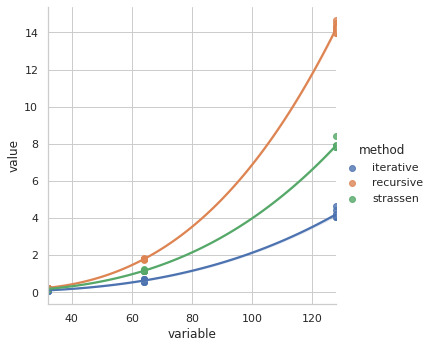

In [72]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.lmplot(x="variable", y="value", hue="method",order=3, data=df)
plt.show()

In [73]:
df_results.groupby('method').median()

,32,64,128
method,,,
iterative,0.091748,0.611627,4.130548
recursive,0.228908,1.765066,14.187838
strassen,0.169709,1.137683,7.861472
